# Datos del alumno

**Nombre**: Bruno


**Apellidos**: Anglés Robles


**Grupo:** B2

# Introducción

Esta es la Fase 4 del proyecto que he venido desarrollando durante el curso de Aprendizaje Supervisado II.

El objetivo de esta fase es mejorar los resultados del proyecto aplicando técnicas de búsqueda exhaustiva (Grid Search) o búsqueda aleatoria (Random Search), y estudio de la simplificación del modelo final elegido, utilizando la información que nos aporta la importancia de los atributos (feature_importance) de los algoritmos de tipo combinación de clasificadores (Ensembles).


**En concreto se pide lo siguiente:**

- Partiendo de la información obtenida en el sprint 3 sobre las variables más importantes para el modelo de conjunto elegido, re-entrenar dicho modelo utilizando las variables más importantes y discutir las diferencias apreciadas tanto en calidad de las predicciones como en velocidad de entrenamiento.
- Definir el rango de valores posibles para al menos dos hiperparámetros del mejor modelo elegido de los sprints anteriores, y utilizar la clase GridSearchCV o RandomizedSearchCV para encontrar la combinación de los mismos que da el mejor resultado para la métrica de puntuación que se define.
- Analizar, discutir y comparar los resultados obtenidos por las diferentes combinaciones de hiperparámetros y dejar reflejadas las conclusiones obtenidas en el cuaderno que se entregue.
- Todas las conclusiones extraídas deben estar soportadas por métricas o visualizaciones (curva ROC, matriz de confusión, etc.) que justifican lo que se está defendiendo.
- **Fase adicional:**  Probar alguna técnica de muestreo para el manejo del balanceo de las clases (under-sampling, over-sampling, etc.) y comprobar si mejoran o empeoran los resultados obtenidos por el mejor modelo seleccionado en los sprints anteriores.  


Este cuaderno es una continuación del que se desarrolló en los sprints 1, 2 y 3

- Enlace Google Colab: [Sprint 1](https://colab.research.google.com/drive/1E_PXauQA95SVK2Y19QILm8avfqGFdm9U?usp=sharing), [Sprint 2](https://colab.research.google.com/drive/1GAhs1dnr50ULcBYIsxMbl3vgw5CgRItz?usp=share_link), [Sprint 3](https://colab.research.google.com/drive/1GhukOPPthq9-DlBdi54ZX5F353Z11se9?usp=share_link)
- Enlace Github: [Sprint 1](https://github.com/tuxsy/iebs-master-data-science/blob/main/m06/c1/sprint/Sprint1_Bruno_AnglesRobles.ipynb), [Sprint 2](https://github.com/tuxsy/iebs-master-data-science/blob/main/m06/c2/sprint/Sprint2_Bruno_Angl%C3%A9sRobles_ipynb.ipynb), [Sprint 3](https://github.com/tuxsy/iebs-master-data-science/blob/main/m06/c3/sprint/Sprint3_Bruno_AnglesRobles.ipynb)


## Resumen de anteriores fases

**FASE 1: Análisis descriptivo y entrenamiento de los dos primeros modelos**

En esta primera fase realicé un análisis descriptivo de las variables, tanto individual como en conjunto, y entrené dos modelos diferentes

- KNN
- Regresión Logística

Para comparar los dos modelos usamos las siguientes métricas

- Accuracy
- Curva ROC y AUC
- F1-score de la lase positiva, ya que en este problema nos interesa que el modelo sea mejor prediciendo si el candidato Abandonará o no.
- Recall de la clase positiva, ya que es preferible tener falsos positivos (el modelo predice abandono y se equivoca) que falsos negativos (el modelo predice que el candidato se queda y abandona)

KNN resultó ser el mejor modelo en esta fase según todas las métricas.

Enlaces: [Google Colab](https://colab.research.google.com/drive/1E_PXauQA95SVK2Y19QILm8avfqGFdm9U?usp=sharing), [Github](https://github.com/tuxsy/iebs-master-data-science/blob/main/m06/c1/sprint/Sprint1_Bruno_AnglesRobles.ipynb)

In [1]:
metrics_summary = [
    {"sprint": 1, "model": "KNN",
    "accuracy":0.93, "auc": 0.96, "f1-score": 0.86, "recall": 0.88,
    "hyperparameters": {"n_neighbors": 5}},
    
    {"sprint": 1, "model": "Logistic Regression",
    "accuracy":0.79, "auc": 0.81, "f1-score": 0.43, "recall": 0.34,
    "hyperparameters": dict(C=4, solver='lbfgs', tol=0.14, max_iter=260,fit_intercept=True)},
]

**FASE 2. Entrenar tres árboles de decisión**

En esta fase se prioriza por la explicabilidad de los modelos y para ello entreno tres árboles de decisión, uno sin ningún criterio de poda y dos con distintos hiperparámetros.

Para comparar el mejor modelo se usan las mismas métricas que en la Fase 1, pero además se analiza visualmente el árbol resultante priorizando por

- una profundidad del árbol manejable, ya que queremos que sea simple de explicar
- el número de muestras en las hojas, si este número es muy bajo indica que el árbol se ha sobreajustado

Según este análisis el primer árbol (sin hiperparámetros) queda descartado ya que sufre de sobreajuste y de demasiada profundidad.

Tras entrenar con distintos hiperparámetros se elige el segundo árbol y este resulta tener mayor capacidad predictiva que el KNN de la fase anterior.

Enlaces: [Google Clolab](https://colab.research.google.com/drive/1GAhs1dnr50ULcBYIsxMbl3vgw5CgRItz?usp=share_link), [Github](https://github.com/tuxsy/iebs-master-data-science/blob/main/m06/c2/sprint/Sprint2_Bruno_Angl%C3%A9sRobles_ipynb.ipynb), 

In [2]:
metrics_summary.append({"sprint": 2, "model": "Decission Tree #2",
    "accuracy":0.97, "auc": 0.97, "f1-score": 0.93, "recall": 0.93,
    "hyperparameters": {"max_depth":4}})

metrics_summary.append({"sprint": 2, "model": "Decission Tree #3",
    "accuracy":0.96, "auc": 0.97, "f1-score": 0.93, "recall": 0.92,
    "hyperparameters": {'max_depth': 4,'criterion': 'entropy', 'max_features': 16, 
                        'min_samples_leaf': 15, 'min_samples_split': 69}})

**FASE 3: Entrenar 2 tipos diferentes de Ensembles**

Llegados a esta fase el Cliente está satisfecho con los árboles de decisión y nos pide si podemos mejorar los modelos de algún modo. Para ello pruebo con un algoritmo de Bagging (Random Forest) y otro de Boosting(Gradient Boosting), probando distintos hiperparámetros para cada uno.

Para buscar los mejores hiperparámetros me apoyo en una combinación de Random Search + Grid Search. Además se ha empleado la técnica de StratifyedKFold para realizar una validación cruzada.

En esta ocasión el mejor poder de predicción lo conseguí con el primer modelo de Gradient Boosting.

Como curiosidad, el primer algoritmo de Bagging entrenado (Random Forest #1) tuvo peores métricas que el peor de los árboles de decisión. Dado que Random Forest usa árboles de decisión como *weak learners* ¿cómo se pueden interpretar unas peores métricas?

Probablemente sea a que los árboles de decisión de la segunda fase no fueran lo suficientemente robustos. Hay que tener en cuenta que en esta fase hemos empleado una validación cruzada adaptada a la naturaleza desbalanceada del dataset.

Enlaces: [Google Colab](https://colab.research.google.com/drive/1GhukOPPthq9-DlBdi54ZX5F353Z11se9?usp=share_link), [Github](https://github.com/tuxsy/iebs-master-data-science/blob/main/m06/c3/sprint/Sprint3_Bruno_AnglesRobles.ipynb)

In [3]:
metrics_summary.append({"sprint": 3, "model": "Random Forest #1",
    "accuracy":0.92, "auc": 0.98, "f1-score": 0.80, "recall": 0.67,
    "hyperparameters": dict(max_depth = 4,n_estimators=100)})

metrics_summary.append({"sprint": 3, "model": "Random Forest #2",
    "accuracy":0.98, "auc": 0.99, "f1-score": 0.96, "recall": 0.92,
    "hyperparameters": {'bootstrap': False,
                         'max_depth': 9,
                         'max_features': 'sqrt',
                         'min_samples_leaf': 1,
                         'min_samples_split': 4,
                         'n_estimators': 201}})

metrics_summary.append({"sprint": 3, "model": "Gradient Boosting #1",
    "accuracy":0.99, "auc": 0.99, "f1-score": 0.97, "recall": 0.96,
    "hyperparameters": dict(
        n_estimators=201,
        max_depth=9,
        max_features="sqrt",
        min_samples_leaf=1,
        min_samples_split=4,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.001
    )})

metrics_summary.append({"sprint": 3, "model": "Gradient Boosting #2",
    "accuracy":0.99, "auc": 0.99, "f1-score": 0.97, "recall": 0.96,
    "hyperparameters": {
        'learning_rate': 0.4,
        'max_features': 17,
        'min_samples_leaf': 3,
        'min_samples_split': 9,
        'n_estimators': 553 ,
        'validation_fraction': 0.2,
        'n_iter_no_change': 5,
        'tol': 0.001
    }})

In [4]:
# RESUMEN DE LAS MÉTRICAS OBTENIDAS
import pandas as pd

df_metrics = pd.DataFrame(metrics_summary).sort_values(by="f1-score", ascending=False)
df_metrics

,sprint,model,accuracy,auc,f1-score,recall,hyperparameters
6,3,Gradient Boosting #1,0.99,0.99,0.97,0.96,"{'n_estimators': 201, 'max_depth': 9, 'max_fea..."
7,3,Gradient Boosting #2,0.99,0.99,0.97,0.96,"{'learning_rate': 0.4, 'max_features': 17, 'mi..."
5,3,Random Forest #2,0.98,0.99,0.96,0.92,"{'bootstrap': False, 'max_depth': 9, 'max_feat..."
2,2,Decission Tree #2,0.97,0.97,0.93,0.93,{'max_depth': 4}
3,2,Decission Tree #3,0.96,0.97,0.93,0.92,"{'max_depth': 4, 'criterion': 'entropy', 'max_..."
0,1,KNN,0.93,0.96,0.86,0.88,{'n_neighbors': 5}
4,3,Random Forest #1,0.92,0.98,0.80,0.67,"{'max_depth': 4, 'n_estimators': 100}"
1,1,Logistic Regression,0.79,0.81,0.43,0.34,"{'C': 4, 'solver': 'lbfgs', 'tol': 0.14, 'max_..."


Parece claro que el mejor modelo que hemos entrenado de momento es el **Gradient Boosting #1**.

**¿Cómo podemos mejorar a partir de ahora?**

El poder de predicción es realmente bueno, pero aún nos queda probar con alguna que otra técnica.

- Si empleamos solo las variables más relevantes identificadas por el ensemble, ¿cómo se ve afectado el rendimiento del modelo? ¿Recomendarías quedarnos solo con esas variables?
- ¿Cambian las métricas de evaluación del modelo si aplicamos alguna técnica que tenga en cuenta el desbalanceo de clases? En caso afirmativo indica en qué varía y porqué

# Obtención de las variables más relevantes

Voy a reptir el entrenamiento del mejor model que tenemos hasta ahora para obtener las variables más relevantes.

In [5]:
# IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split # Importamos función train_test_split 
from sklearn import metrics #Importamos métricas del módulo de scikit-learn para calcular lel accuracy del modelo
# style.use('ggplot') or plt.style.use('ggplot')
from IPython.display import display
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# CARGA DE DATOS
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'
datos = pd.read_csv("Rotacion_empleados.csv")
# El dataset contiene una varialbe llamada "sales" que debemos renombrar a "department"
datos = datos.rename(columns={"sales": "department"})
datos.head()

--2023-03-01 22:22:39--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 142.250.200.142
Conectando con drive.google.com (drive.google.com)[142.250.200.142]:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ct96q4capr8q0fqa5b1th0d7qjit5hc7/1677705750000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=268c7197-66bc-41fd-98b5-3929e78263c6 [following]
--2023-03-01 22:22:40--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ct96q4capr8q0fqa5b1th0d7qjit5hc7/1677705750000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=268c7197-66bc-41fd-98b5-3929e78263c6
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 142.250.184.1
Conectando con doc-08-b0-docs.googleuserc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# COPIA DE SEGURIDAD
datos_orig = datos.loc[:,:]

In [8]:
# Transformación de la variable categórica "department"

print("Before:", datos.loc[:10, "department"].values)

datos = (
    pd.get_dummies(
        datos, 
        columns=["department"],
        )
    )

print("After:", datos.loc[:10, [c for c in datos.columns if "department" in c]].values)

Before: ['sales' 'sales' 'sales' 'sales' 'sales' 'sales' 'sales' 'sales' 'sales'
 'sales' 'sales']
After: [[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


In [9]:
# Transformación de la variable categórica "salary"
print("Before:", set(datos.salary))
datos.salary = datos.salary.map({"low": 1, "medium": 2, "high":3})
print("After:", set(datos.salary))

Before: {'medium', 'high', 'low'}
After: {1, 2, 3}


In [10]:
# Separamos el conjunto de datos en features (X) y target (y)
features = list(datos.columns[datos.columns != "left"])
X = datos.loc[:, datos.columns != "left"].values
y = datos.loc[:, datos.columns == "left"].values.flatten()

In [11]:
# Instanca de StratifiedKFold que reutilizaremos a lo largo del cuaderno
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state = 42)

In [12]:
# Encapsulo la lógica de entrenamiento en una función

# Esta clase me sirve para almacenar el resutlado del entenamiento
class ModelTraining:
    def __init__(self):
        self.name = None
        self.model = None
        self.time = None
        self.acc_mean = None
        self.acc_mean_train = None
        self.y_pred = None
        self.bias = None
        self.variance = None
        self.conf_matrix = None
        self.clf_report = None
        
def train_model(name, model, X, y, features) -> ModelTraining:
    mt = ModelTraining()
    mt.name = name
    mt.model = model
    print(mt.name, mt.model)
    print()

    train_scores = []
    test_scores = []

    start = time.time()
    for train_index, test_index in skf.split(X, y):
        X_train = datos.iloc[train_index].loc[:, features]
        X_test = datos.iloc[test_index].loc[:,features]
        y_train = datos.iloc[train_index].loc[:,'left']
        y_test = datos.loc[test_index].loc[:,'left']
        
        model.fit(X_train, y_train) #Training the model

        # Save train / test scores
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
    end = time.time()
    mt.time = end - start
    print(f"Tiempo empleado: {mt.time:.2f} segundos")
    print()

    mt.acc_mean = np.mean(test_scores)
    mt.acc_mean_train = np.mean(train_scores)
    print(f"Train score for {name}: mean={mt.acc_mean_train:.4f}, std={np.std(train_scores):.6f}")
    print(f"Test score for {name}: mean={mt.acc_mean:.4f}, std={np.std(test_scores):.6f}")
    print()

    # Use cross_val_predict to get predicted labels
    mt.y_pred = cross_val_predict(model, X, y, cv=skf)

    # Calculate the bias and variance
    mt.bias = np.abs(y - mt.y_pred).mean()
    mt.variance = mt.acc_mean - mt.bias
    print("Bias:", "%.3f" % mt.bias)
    print("Variance:", "%.3f" % mt.variance)
    print()

    # Print confussion matrix
    mt.conf_matrix = metrics.confusion_matrix(y_true=y, y_pred=mt.y_pred)
    print("Confussion Matrix:")
    print(mt.conf_matrix)
    print()

    # Print classification report
    mt.clf_report = metrics.classification_report(y_true=y, y_pred=mt.y_pred)
    print("Classification report:")
    print(mt.clf_report)
    print()
    return mt
    
# ENTRENAMIENTO GRADIENT BOOSTING (SPRINT 3)
from sklearn.ensemble import GradientBoostingClassifier

hyper = df_metrics.nlargest(1, "f1-score").loc[:,"hyperparameters"].iloc[0]
print("Hyperparameters:", hyper)
print()

gbc_1 = train_model(name="GradientBoostingClassifier #1", 
                   model=GradientBoostingClassifier(
                            random_state=42,
                            **hyper
                    ),
                   X=X,
                   y=y,
                   features=features
)

Hyperparameters: {'n_estimators': 201, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'validation_fraction': 0.2, 'n_iter_no_change': 5, 'tol': 0.001}

GradientBoostingClassifier #1 GradientBoostingClassifier(max_depth=9, max_features='sqrt',
                           min_samples_split=4, n_estimators=201,
                           n_iter_no_change=5, random_state=42, tol=0.001,
                           validation_fraction=0.2)

Tiempo empleado: 2.64 segundos

Train score for GradientBoostingClassifier #1: mean=0.9942, std=0.001357
Test score for GradientBoostingClassifier #1: mean=0.9869, std=0.002537

Bias: 0.013
Variance: 0.974

Confussion Matrix:
[[11386    42]
 [  155  3416]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.96      0.97      3571

    accuracy                           0.99     14999
   macro avg       0.99 

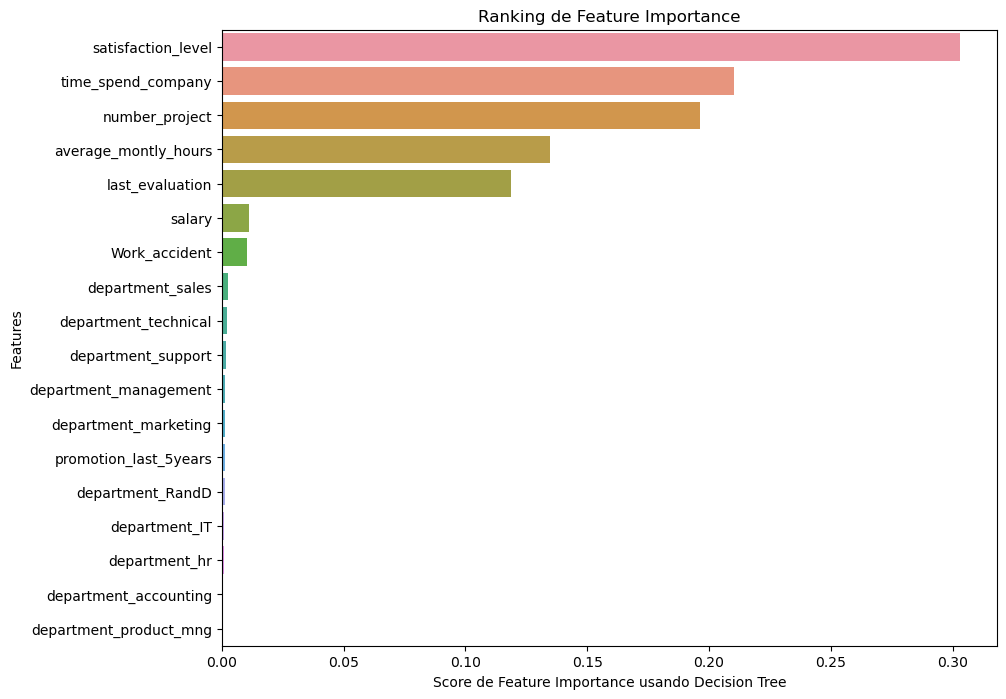

In [13]:
# VARIABLES MÁS RELEVANTES
plt.figure(figsize=(10,8))

feature_imp=pd.Series(gbc_1.model.feature_importances_,
index=list(features)).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Feature Importance usando Decision Tree')
plt.ylabel('Features')
plt.title("Ranking de Feature Importance")

plt.show()

Vemos que hay un salto importante en cuanto a la importancia a partir de `last_evaluation` por lo tanto nos quedamos con las 5 primeras variables

In [14]:
# SELECCIÓN DE LAS VARIABLES MÁS RELEVANTES
most_important_features = list(feature_imp.iloc[:5].index)
print(most_important_features)

['satisfaction_level', 'time_spend_company', 'number_project', 'average_montly_hours', 'last_evaluation']


# Entrenar el mejor modelo con las variables más relevantes

En ese apartado re-entrenaré tres modelos. Dos de ellos son *ensembles* basados en árboles de decisión
- Gradient Boosting por ser el mejor modelo obtenido hasta el momento, pero que tiene poco margen de mejora.
- Random Forest que es el peor modelo del Sprint 3 y con un margen de mejora mayor

El tercer modelo es KNN que se basa en un algoritmo diferente.

Con este ejercicio comprobaremos si la selección de las mejores caractrerísticas mejora los distintos modelos.

## Re-entrenar el mejor modelo con los mismos hiperparámetros

In [15]:
i_most_important = [features.index(f) for f in most_important_features]
X_most_important = X[:,i_most_important]
print(X_most_important.shape)

(14999, 5)


In [16]:
gbc_4a = train_model(
    name="GradientBoosting #4a",
    model=GradientBoostingClassifier(
        random_state=42,
        **hyper
    ),
    X=X_most_important,
    y=y,
    features=most_important_features
)
print("Métricas de referencia")
df_metrics.loc[df_metrics.model == "Gradient Boosting #1"]

GradientBoosting #4a GradientBoostingClassifier(max_depth=9, max_features='sqrt',
                           min_samples_split=4, n_estimators=201,
                           n_iter_no_change=5, random_state=42, tol=0.001,
                           validation_fraction=0.2)

Tiempo empleado: 2.48 segundos

Train score for GradientBoosting #4a: mean=0.9951, std=0.000641
Test score for GradientBoosting #4a: mean=0.9887, std=0.001726

Bias: 0.011
Variance: 0.977

Confussion Matrix:
[[11399    29]
 [  141  3430]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.96      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.98      0.98     14999
weighted avg       0.99      0.99      0.99     14999


Métricas de referencia


,sprint,model,accuracy,auc,f1-score,recall,hyperparameters
6,3,Gradient Boosting #1,0.99,0.99,0.97,0.96,"{'n_estimators': 201, 'max_depth': 9, 'max_fea..."


El *f1-score* ha mejorado un poco. Voy a echar un vistazo a las matrices de confusión

In [17]:
# Guardamos las métricas
df_metrics = pd.concat([df_metrics, pd.DataFrame(data=[{"sprint": 4, "model": gbc_4a.name,
    "accuracy":0.99, "auc": None, "f1-score": 0.98, "recall": 0.96,
    "hyperparameters": hyper}])]).reset_index(drop=True)

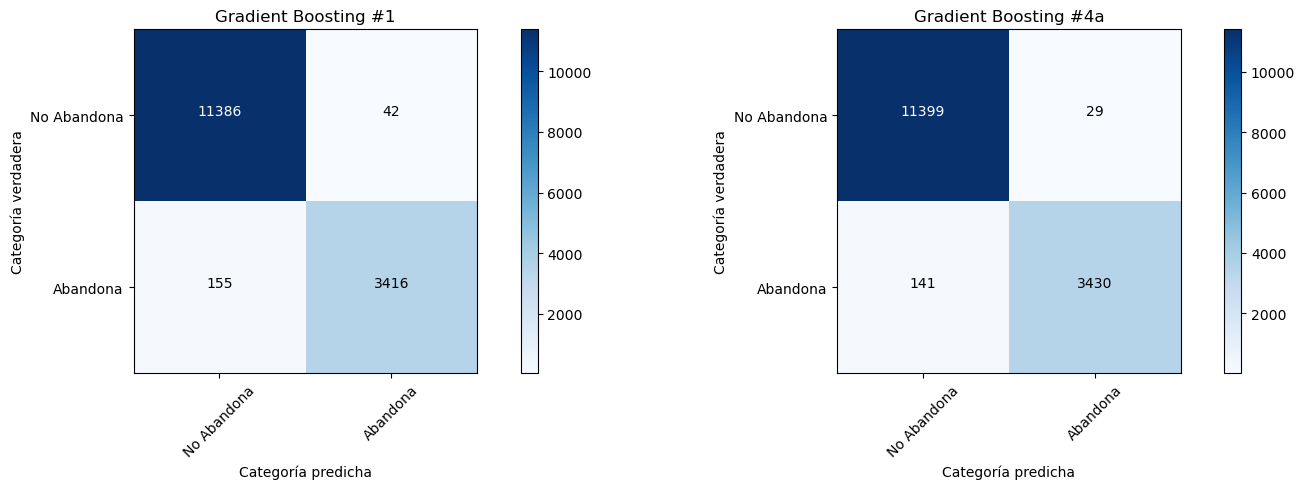

In [18]:
# Comparo las matrices de confusión

import itertools
def plot_confusion_matrix(cm, classes=["No Abandona", "Abandona"],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y representa la matriz de confusión
    Puede aplicarse la normalización de la matriz con el parámetro `normalize=True`.
    """
    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Matriz de confusión normalizada")
    # else:
    #     print('Matriz de confusión sin normalización')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Categoría verdadera')
    plt.xlabel('Categoría predicha')
    plt.tight_layout()

plt.figure(figsize=(16, 5))
plt.subplot(121)
plot_confusion_matrix(gbc_1.conf_matrix, title="Gradient Boosting #1")

plt.subplot(122)
plot_confusion_matrix(gbc_4a.conf_matrix, title="Gradient Boosting #4a")

Aquí vemos que la mejora es pequeña, pero el nuevo modelo (#4a) se equivoca ligeramente menos.

Por una parte es normal que haya una mejora ya que hemos eliminado variables que podían estar añadiendo cierto ruído.

Por otra parte es normal que la mejora sea pequeña, ya que partíamos de un *f1-score* muy alto.

¿Qué pasaría si entrenamos con un modelo que funcionaba peor?

## Re-entrenar el peor modelo del Sprint 3 (Random Forest)

Vamos a ver cómo funciona otro tipo de ensemle, Bagging en este caso. Ahora partimos de un *f1-score* bastante mejorable.

In [19]:
rf_metrics = df_metrics.loc[df_metrics.model == "Random Forest #1"]
rf_metrics

,sprint,model,accuracy,auc,f1-score,recall,hyperparameters
6,3,Random Forest #1,0.92,0.98,0.8,0.67,"{'max_depth': 4, 'n_estimators': 100}"


In [20]:
rf_hyper = rf_metrics.loc[:,"hyperparameters"].iloc[0]
rf_hyper

{'max_depth': 4, 'n_estimators': 100}

In [21]:
# ENTRENAMOS DE NUEVO RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier


rf_4a = train_model(
    name="RandomForest #4a",
    model=RandomForestClassifier(
        random_state=42, n_jobs=-1, **rf_hyper
    ),
    X=X_most_important,
    y=y,
    features=most_important_features
)
print("Métricas de referencia")
rf_metrics

RandomForest #4a RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=42)

Tiempo empleado: 0.74 segundos

Train score for RandomForest #4a: mean=0.9716, std=0.000256
Test score for RandomForest #4a: mean=0.9715, std=0.002639

Bias: 0.029
Variance: 0.943

Confussion Matrix:
[[11341    87]
 [  341  3230]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11428
           1       0.97      0.90      0.94      3571

    accuracy                           0.97     14999
   macro avg       0.97      0.95      0.96     14999
weighted avg       0.97      0.97      0.97     14999


Métricas de referencia


,sprint,model,accuracy,auc,f1-score,recall,hyperparameters
6,3,Random Forest #1,0.92,0.98,0.8,0.67,"{'max_depth': 4, 'n_estimators': 100}"


La mejora ha sido significativa. Efectivamente vemos que estas variables estaban añadiendo cierto ruído que afectaba a la predicción.

In [22]:
# Guardamos las métricas
df_metrics = pd.concat([df_metrics, pd.DataFrame(data=[{"sprint": 4, "model": rf_4a.name,
    "accuracy":0.97, "auc": None, "f1-score": 0.94, "recall": 0.90,
    "hyperparameters": rf_hyper}])]).reset_index(drop=True)


## Re-entrenar KNN

In [23]:
# ENTRENAMOS KNN
# Entrenamos primero con todas las características,
#   ya que en el sprint 1 no usamos StratifyedKFold
from sklearn.neighbors import KNeighborsClassifier

knn_hyper = df_metrics.loc[df_metrics.model == "KNN", "hyperparameters"].iloc[0]

knn_4 = train_model(
    name="KNeighborsClassifier #4",
    model=KNeighborsClassifier(**knn_hyper),
    X=X,
    y=y,
    features=features
)

KNeighborsClassifier #4 KNeighborsClassifier()

Tiempo empleado: 1.19 segundos

Train score for KNeighborsClassifier #4: mean=0.9552, std=0.001231
Test score for KNeighborsClassifier #4: mean=0.9361, std=0.002792

Bias: 0.064
Variance: 0.872

Confussion Matrix:
[[10745   683]
 [  276  3295]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11428
           1       0.83      0.92      0.87      3571

    accuracy                           0.94     14999
   macro avg       0.90      0.93      0.92     14999
weighted avg       0.94      0.94      0.94     14999




In [24]:
# Guardamos las métricas
df_metrics = pd.concat([df_metrics, pd.DataFrame(data=[{"sprint": 4, "model": "KNN #4",
    "accuracy":0.94, "auc": None, "f1-score": 0.87, "recall": 0.92,
    "hyperparameters": knn_hyper}])]).reset_index(drop=True)

KNeighborsClassifier #4a KNeighborsClassifier()

Tiempo empleado: 0.75 segundos

Train score for KNeighborsClassifier #4a: mean=0.9645, std=0.001104
Test score for KNeighborsClassifier #4a: mean=0.9509, std=0.002545

Bias: 0.049
Variance: 0.902

Confussion Matrix:
[[10966   462]
 [  274  3297]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11428
           1       0.88      0.92      0.90      3571

    accuracy                           0.95     14999
   macro avg       0.93      0.94      0.93     14999
weighted avg       0.95      0.95      0.95     14999


Métricas de referencia



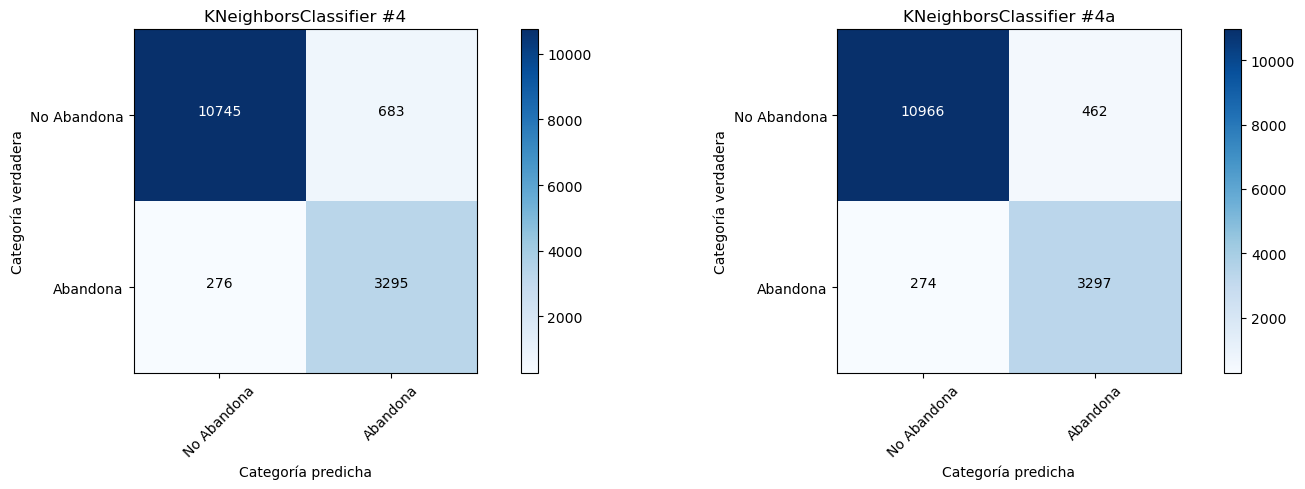

In [25]:
# Entrenamos de nuevo filtrandoo por las características más relevantes.
knn_4a = train_model(
    name="KNeighborsClassifier #4a",
    model=KNeighborsClassifier(**knn_hyper),
    X=X_most_important,
    y=y,
    features=most_important_features
)
print("Métricas de referencia")
df_metrics.loc[df_metrics.model == "KNN #4"]
print()

plt.figure(figsize=(16, 5))
plt.subplot(121)
plot_confusion_matrix(knn_4.conf_matrix, title=knn_4.name)

plt.subplot(122)
plot_confusion_matrix(knn_4a.conf_matrix, title=knn_4a.name)

KNN también también ha mejorado con la selección de las mejores características

In [26]:
# Guardamos las métricas
df_metrics = pd.concat([df_metrics, pd.DataFrame(data=[{"sprint": 4, "model": "KNN #4a",
    "accuracy":0.95, "auc": None, "f1-score": 0.90, "recall": 0.92,
    "hyperparameters": knn_hyper}])]).reset_index(drop=True)

## Conclusiones

Con este ejercicio parece claro que los árboles de decisión son una buena herramienta de *feature engineering*.

Esto lo hemos comprobado re-enrenando tres modelos diferentes, con los mismos hiperparámetros, pero sólo con las características más relevantes.

In [27]:
df_metrics.sort_values(by="f1-score", ascending=False)

,sprint,model,accuracy,auc,f1-score,recall,hyperparameters
8,4,GradientBoosting #4a,0.99,None,0.98,0.96,"{'n_estimators': 201, 'max_depth': 9, 'max_fea..."
0,3,Gradient Boosting #1,0.99,0.99,0.97,0.96,"{'n_estimators': 201, 'max_depth': 9, 'max_fea..."
1,3,Gradient Boosting #2,0.99,0.99,0.97,0.96,"{'learning_rate': 0.4, 'max_features': 17, 'mi..."
2,3,Random Forest #2,0.98,0.99,0.96,0.92,"{'bootstrap': False, 'max_depth': 9, 'max_feat..."
9,4,RandomForest #4a,0.97,None,0.94,0.90,"{'max_depth': 4, 'n_estimators': 100}"
3,2,Decission Tree #2,0.97,0.97,0.93,0.93,{'max_depth': 4}
4,2,Decission Tree #3,0.96,0.97,0.93,0.92,"{'max_depth': 4, 'criterion': 'entropy', 'max_..."
11,4,KNN #4a,0.95,None,0.90,0.92,{'n_neighbors': 5}
10,4,KNN #4,0.94,None,0.87,0.92,{'n_neighbors': 5}
5,1,KNN,0.93,0.96,0.86,0.88,{'n_neighbors': 5}


Como vemos en esta tabla los modelos entrenados con las características más relevantes (#4a) han obtenido mejor *f1-score* que las versiones entrenads con todo el dataset.

También vemos que en el ranking de mejores algoritmos (para este dataset) tenemos

1. Gradient Boosting
1. Random Forest
1. Decission Tree
1. KNN

# Probar con una técnica de balanceo de clases

En el Sprint 1, durante el análisis exploratorio, se vió que teníamos un dataset desbalanceado. Esto es: teníamos muchos menos ejemplos positivos que negativos.

En el sprint 3 usé StratifyedKFold para

- mantener la misma proporción de positivos / negativos en los conjuntos de entrenamiento y test
- realizar una validación cruzada de modo que el modelo final sea más robusto

No obstante se pueden usar dos técnicas para balancear el dataset

- eliminar muestras de la clase mayoritaria, esto es la negativa
- crear nuevas muestras sintéticas de la clase minoritariaa

En este apartado probaré la segunda técnica, llamada *oversampling* (sobre-muestreo)

## Preparar un dataset balanceado

El primer paso es generar muestras sinténticas dela clase positiva. Eso lo haré usando el método `resample()` del paquete `sklearn.utils`.

N. samples classl 1: 2500 -> 7999


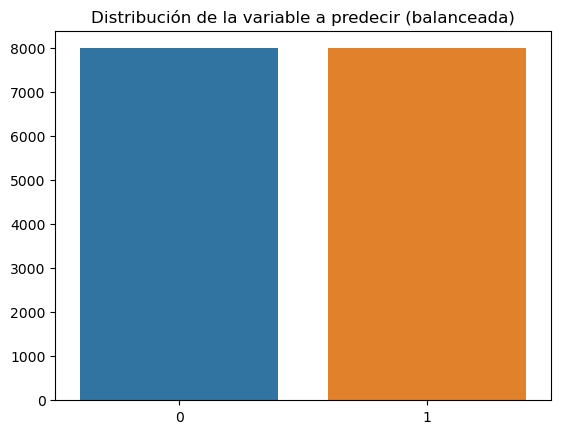

In [28]:
# PREPARAR UN DATASET BALANCEADO
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample

X = datos.loc[:, datos.columns != "left"]
y = datos.loc[:, "left"]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.3,
                                                   shuffle= True, 
                                                   stratify=y,
                                                   random_state= 42)

X_train_o, y_train_o = resample(
    X_train[y_train == 1],
    y_train[y_train == 1],
    replace=True,
    n_samples=X_train[y_train == 0].shape[0],
    random_state=42
)

X_train_o = np.concatenate([X_train[y == 0], X_train_o])
y_train_o = np.concatenate([y_train[y == 0], y_train_o])


print("N. samples classl 1:", X_train[y_train == 1].shape[0], "->", X_train_o[y_train_o == 1].shape[0])
unique, counts = np.unique(y_train_o, return_counts=True)
plt.title("Distribución de la variable a predecir (balanceada)")
sns.barplot(x=unique, y=counts)
plt.show()

## Entrenar Gradient Boosting

Una vez tengo el dataset balanceado voy a entrenar un algoritmo de Gradient Boosting.

Lo voy a entrenar dos veces, con el dataset balanceado y sin balancear, ya que me interesa usar las particiones de train y test que he hecho más arriba en vez de usar KFold.

In [29]:
# GRADIENT BOOSTING

# Dataset desbalanceado
gbc_unb = GradientBoostingClassifier(
    random_state=42,
    **hyper
)

gbc_unb.fit(X_train, y_train)
y_pred_gbc_unb = gbc_unb.predict(X_test)

print("Report Gradient Boosting (con desbalanceo)")
print(metrics.classification_report(y_test, y_pred_gbc_unb))

# Dataset balanceado
gbc_bal = GradientBoostingClassifier(
    random_state=42,
    **hyper
)

gbc_bal.fit(X_train_o, y_train_o)
y_pred_gbc_bal = gbc_bal.predict(X_test)

print("Report Gradient Boosting (balanceado)")
print(metrics.classification_report(y_test, y_pred_gbc_bal))

Report Gradient Boosting (con desbalanceo)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Report Gradient Boosting (balanceado)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.97      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Al realizar oversampling, aumenta el recall de la clase positiva que es lo que nos interesa. El recall de la clases negativa ya no es del 100%.

La precisión de la clase 1 también se ve afectada con el oversampling.

## Entrenar Random Forest

In [30]:
# RANDOM FOREST
# Dataset desbalanceado
rf_unb = RandomForestClassifier(
    random_state=42, n_jobs=-1, **rf_hyper
)

rf_unb.fit(X_train, y_train)
y_pred_rf_unb = rf_unb.predict(X_test)

print("Report Random Forest (con desbalanceo)")
print(metrics.classification_report(y_test, y_pred_rf_unb))

# Dataset balanceado
rf_bal = RandomForestClassifier(
    random_state=42, n_jobs=-1, **rf_hyper
)

rf_bal.fit(X_train_o, y_train_o)
y_pred_rf_bal = rf_bal.predict(X_test)

print("Report Random Forest (balanceado)")
print(metrics.classification_report(y_test, y_pred_rf_bal))

Report Random Forest (con desbalanceo)
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3429
           1       0.98      0.67      0.79      1071

    accuracy                           0.92      4500
   macro avg       0.94      0.83      0.87      4500
weighted avg       0.92      0.92      0.91      4500

Report Random Forest (balanceado)
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3429
           1       0.89      0.92      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



En este caso aumenta el f1-score de ambas clases. El recall de la clase 0 baja del 100% al 60% y la precisión de la clase 1 disminuye al mismo tiempo que aumenta el de la clase 0.

## Entrenar KNN

In [31]:
# Dataset desbalanceado
knn_unb = model = KNeighborsClassifier(n_neighbors=5)

knn_unb.fit(X_train, y_train)
y_pred_knn_unb = knn_unb.predict(X_test)

print("Report KNN (con desbalanceo)")
print(metrics.classification_report(y_test, y_pred_knn_unb))

# Dataset balanceado
knn_bal = KNeighborsClassifier(n_neighbors=5)

knn_bal.fit(X_train_o, y_train_o)
y_pred_knn_bal = knn_bal.predict(X_test)

print("Report KNN (balanceado)")
print(metrics.classification_report(y_test, y_pred_knn_bal))

Report KNN (con desbalanceo)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3429
           1       0.83      0.92      0.87      1071

    accuracy                           0.94      4500
   macro avg       0.90      0.93      0.92      4500
weighted avg       0.94      0.94      0.94      4500

Report KNN (balanceado)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3429
           1       0.75      0.97      0.85      1071

    accuracy                           0.92      4500
   macro avg       0.87      0.93      0.90      4500
weighted avg       0.93      0.92      0.92      4500



El oversampling ha empeorado KNN en general, la única métrica intersante que ha mejorado es el recall de la clase 1.